# Desicion Tree Classifier

## Importing Libraries

In [1]:
import json
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split


## Load  Dataset

In [2]:
from sklearn.tree import DecisionTreeClassifier
url = "Test-Data-10.csv"
df = pd.read_csv(url)
# Except the year, all the features are taken
include = [ 'Age', 'Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,'Lifetime Psychiatric Hospitalizations' ,
           'Past Suicide Attempts' ,'Any suicidal thoughts mentioned' ,'Self-Injurious Behaviour' ,
           'Psychiatric Disorders' ,'Past Illnesses' ,'Alcohol/ drug Consumption','Anger',
           'Sleep Problem', 'Social Iscolation', 'Sad/ Weary' , 'Humilated', 'Not Suicide(0)/Suicide(1)']  

 
df.head(20)

,Year,Not Suicide(0)/Suicide(1),Age,Gender,Religon,Race,Nature Of Occupation,Civil Status,Education Level,Reason,...,Any suicidal thoughts mentioned,Self-Injurious Behaviour,Psychiatric Disorders,Past Illnesses,Alcohol/ drug Consumption,Anger,Sleep Problem,Social Iscolation,Sad/ Weary,Humilated
0,2018,0,30,F,Islam,Muslim,Administrative Executive Managerial & related ...,Unmarried,From Grade 1 to 7,Asthma,...,0,0,None,Asthma,None,0,0,0,0,0
1,2018,0,91,F,Islam,Muslim,Sales worker,Married,University Degree or above,Alzheimer's disease,...,0,0,None,Other,None,0,1,0,0,0
2,2018,0,85,M,Islam,Muslim,Security Personnel,Married,University Degree or above,Stroke/Chronic diseases & Physical disabilities,...,0,0,None,Diabetes,None,0,1,0,0,0
3,2017,1,87,M,Christian,Sinhalese,Unemployed persons,Married,School not attended,Harrasment by the husband & family disputes,...,1,0,None,Chronic pain,Frequent,1,1,1,1,1
4,2018,0,59,M,Islam,Muslim,Pensioners,Unmarried,Other,Alzheimer's disease,...,0,0,None,COPD,None,0,1,0,1,1
5,2017,1,31,M,Other,Sinhalese,Agricultural Animal Husbandry Fisherman & rela...,Unmarried,Passed G.C.E (O/L),Harrasment by the husband & family disputes,...,1,1,None,Other,Frequent,1,1,1,1,1
6,2018,0,75,M,Christian,Burger,Armed Services,Married,Passed G.C.E (A/L),Natural Death,...,0,0,None,Unknown,None,0,0,0,0,0
7,2018,1,47,M,Buddhist,Sinhalese,Unemployed persons,Married,School not attended,Harrasment by the husband & family disputes,...,1,1,None,Other,Moderate,0,0,1,1,0
8,2018,0,58,M,Christian,Burger,Armed Services,Unmarried,University Degree or above,Diabetes,...,0,0,None,Unknown,None,0,0,0,0,0
9,2018,0,36,M,Hindu,Tamil,Armed Services,Married,University Degree or above,Natural Death,...,0,0,None,Unknown,None,0,1,0,0,0


## Replacing unwanted labels with a unique label

In [3]:
df['Reason'].replace(['Asthma', "Alzheimer's disease", 'Diabetes',
              'Cirrhosis', 'Ischemic heart disease', 
              'Road Accident','Chronic kidney disease'],
             ['Natural Death','Natural Death','Natural Death','Natural Death',
              'Natural Death','Natural Death','Natural Death'], inplace = True)
df['Reason'].replace(['Stroke/Chronic diseases & Physical disabilities'],
             ['Chronic diseases & Physical disabilities'], inplace = True)
df2 = df[include]
df2.Religon.unique()


array(['Islam', 'Christian', 'Other', 'Buddhist', 'Hindu'], dtype=object)

## Label Encoder

In [4]:
category_col =['Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,
           'Psychiatric Disorders' ,'Past Illnesses' ,'Alcohol/ drug Consumption'] 
labelEncoder = preprocessing.LabelEncoder()
mapping_dict={}
for col in category_col:
    df2[col] = labelEncoder.fit_transform(df2[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(df2.head(20))

for x, y in mapping_dict.items():
  print(x, y)

    Age  Gender  Religon  Race  Nature Of Occupation  Civil Status  \
0    30       0        3     1                     0             2   
1    91       0        3     1                     8             1   
2    85       1        3     1                     9             1   
3    87       1        1     3                    12             1   
4    59       1        3     1                     4             2   
5    31       1        4     3                     1             2   
6    75       1        1     0                     2             1   
7    47       1        0     3                    12             1   
8    58       1        1     0                     2             2   
9    36       1        2     4                     2             1   
10   87       1        0     3                    12             1   
11   73       1        1     0                     3             1   
12   44       1        0     3                     1             1   
13   62       1     

c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [5]:
feature_cols = ['Age', 'Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,'Lifetime Psychiatric Hospitalizations' ,
           'Past Suicide Attempts' ,'Any suicidal thoughts mentioned' ,'Self-Injurious Behaviour' ,
           'Psychiatric Disorders' ,'Past Illnesses' ,'Alcohol/ drug Consumption','Anger',
           'Sleep Problem', 'Social Iscolation', 'Sad/ Weary' , 'Humilated']
X = df2[feature_cols] # Features
y = df2['Not Suicide(0)/Suicide(1)']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Building Decision Tree Model

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluating Model

In [7]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.94


## Create Model

In [8]:
# import pickle
# #creating and training a model
# #serializing our model to a file called model.pkl
# pickle.dump(clf, open("model.pkl","wb"))
# print("Model was created!")

[0.         0.05228758 1.        ]
[0.         0.93197279 1.        ]
[2 1 0]
0.9398426037081499


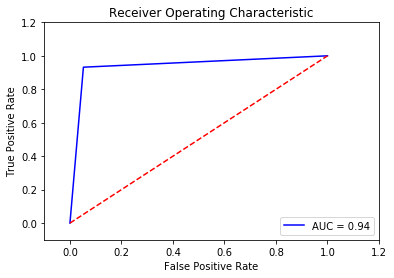

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
